# Victor Rene Pérez Mayen.
## 19005180

### TAREA No.2: Deteccion de anomalias

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [2]:
estaturas = pd.read_csv("estaturas - normales.csv") #Estaturas Normales
anormal = pd.read_csv("estaturas - anomalias.csv") #Estaturas Anormales

#### Estaturas Normales

Text(0, 0.5, 'Edad [años]')

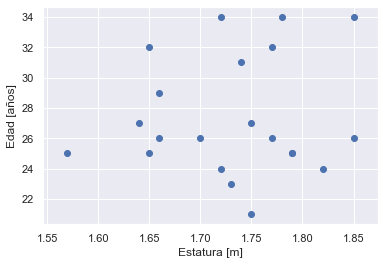

In [3]:
plt.scatter(estaturas["Estatura"],estaturas["Edad"])
plt.xlabel("Estatura [m]")
plt.ylabel("Edad [años]")

#### Estaturas Anormales

Text(0, 0.5, 'Edad [años]')

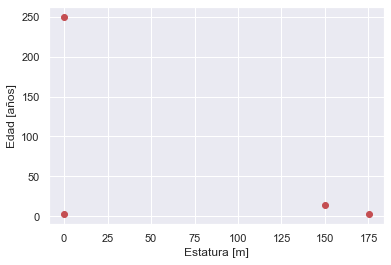

In [4]:
plt.scatter(anormal["Estatura"],anormal["Edad"], color="r")
plt.xlabel("Estatura [m]")
plt.ylabel("Edad [años]")

#### Comparación de alturas

Text(0, 0.5, 'Edad [años]')

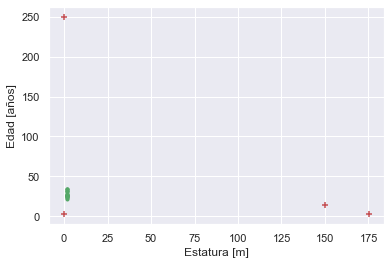

In [5]:
plt.scatter(estaturas["Estatura"],estaturas["Edad"], marker=".", color = "g")
plt.scatter(anormal["Estatura"],anormal["Edad"], marker="+", color = "r")
plt.xlabel("Estatura [m]")
plt.ylabel("Edad [años]")

#### Detección de las anomalias

In [6]:
cov = np.cov(estaturas.T)
prom = np.mean(estaturas)

In [7]:
rv = multivariate_normal(mean = prom, cov = cov)

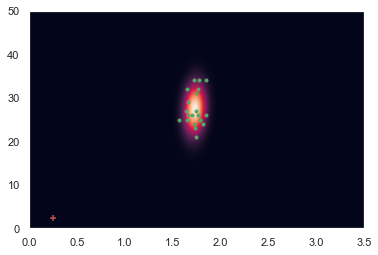

In [8]:
xx, yy = np.meshgrid(np.linspace(0,30,1000), np.linspace(0,50,1000))
zz = np.empty(xx.shape + (2,))
zz[:, :, 0] = xx
zz[:, :, 1] = yy
plt.xlim(0,3.5)
plt.ylim(0,50)
plt.contourf(xx, yy, rv.pdf(zz),500)
plt.scatter(estaturas["Estatura"],estaturas["Edad"], marker=".", color = "g")
plt.scatter(anormal["Estatura"],anormal["Edad"], marker="+", color = "r")

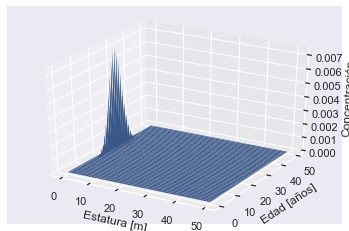

In [9]:
xx, yy = np.meshgrid(np.linspace(0,50,100), np.linspace(0,50,100))
zz = np.empty(xx.shape + (2,))
zz[:, :, 0] = xx
zz[:, :, 1] = yy
figura = plt.figure()
ax = figura.gca(projection='3d')
ax.plot_surface(xx, yy, rv.pdf(zz),linewidth=0)
ax.set_xlabel('Estatura [m]')
ax.set_ylabel('Edad [años]')
ax.set_zlabel('Concentración')
plt.show()